<h3 align='center'><b>PROJECT TITLE - Santander Customer Satisfaction</b></h3>

**Team Name - 4 Folds**

**Team Members** -<br>
*   Harshvardhan Palawat
*   Ishani Bari
*   Heera Lal
*   Muhammad Akmal

Important Note:

This is our Final notebook which is a collaboration of code and ideas from all the team members. Please note that we have done a lot of experimentation (in separate notebook files at individual level) in order to arrive at certain conclusions that you'll see in this notebook.

It is practically not possible to include all the code here and re-run it, but we'll make sure to describe the idea of why something is done and refer you to the code implementation if you want to have a look at it.

In [ ]:
# Downloading an external Library for Feature Selection
!pip install feature-engine

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score,classification_report, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
import pickle
import joblib
from sklearn.inspection import permutation_importance
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Changing the display options for this Notebook
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
# The dataset is stored at this location in Google Drive
path_to_train = 'drive/MyDrive/Univ.AI/Project_AI_1/train.csv'
path_to_test = 'drive/MyDrive/Univ.AI/Project_AI_1/test.csv'

# Exploratory Data Analysis

In [ ]:
# In this section, we'll carry out the EDA in order to get insights from the data

In [ ]:
df_train=pd.read_csv(path_to_train)
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [ ]:
df_train.shape

(76020, 371)

In [ ]:
df_train.dtypes

ID                                 int64
var3                               int64
var15                              int64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                         int64
ind_var1                           int64
ind_var2_0                         int64
ind_var2                           int64
ind_var5_0      

In [ ]:
# As we can see, all the columns are either int or Float

In [ ]:
df_train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [ ]:
df_train['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

#### A few Insights are: 

1. ID is a unique number. It does not offer any value.
2. var3 is a categorical variable with a lot of categories. But most rows have 2 as label. A few rows have label as -999999, that means Null values are most probably already treated and replaced with -999999.
3. var15 is also a categorical variables with a lot of categories but the rows are distributed more evenly amongst the labels.
4. All the variables starting with name imp_op_ are continuous and highly skewed.
5. imp_sal_ is also a continuous variable with skewness
6. All the features starting with ind_var are categorical features with only two classes.
7. There are a few categorical variables like ind_var27 and ind_var28 which only have single value across all the categories. They do not offer any variance hence we can remove these features.
8. All the features starting with num_var and num_aport, num_compra, num_ent, num_med, num_meses, num_reemb, num_sal, num_trasp, num_venta are categorical with multiple categories. Some of these features even have 100 to 200 categories.
9. All the features starting with num_op_var are categorical with multiple categories. Some of these features even have 400 to 500 categories.
10. All the features starting with saldo_var and saldo_medio are continous and they are highly skewed. The minimum values are negative or close to zero and the maximum values are of the order of 10**6.
11. All the features starting with delta_imp and delta_num are continous and they are highly skewed. The minimum values are negative or close to zero and the maximum values are of the order of 10**10.
12. Features starting with imp_amort, imp_var, imp_compra, imp_reemb, imp_trans, imp_trasp, imp_venta,  and imp_aport are also continous are are skewed.
13. var21 seems to be a continous variable with a few large values.
14. var38 is a continuos variable with minimum values of the range 10^3 and maximum values of the range 10^7.
15. TARGET is the response and it is highly imbalanced. The occurance of negatives is around 25 times frequent than positive labels.

The above data analysis gives a feeling that there are a lot of engineered categorical features that are created from continuos variables.

#### A Few Highlights are:
1. There are a lot of constant features.
2. There are a lot of Quasi Constant features, meaning - Majority of the rows has a constant value and only a few 100 values are different.
3. Missing values are imputed with -999999 in column var3.
4. There are a lot of Zeroes in each row and we can create a new feature out of it, which counts the total number of zeroes in a row.

In [ ]:
# We have identified that missing values are imputed with -999999 in one of the columns 
# Let's check whether there are other columns in which we have done this
df_train[df_train['var3']==-999999].head()
(df_train==-999999).sum().sum()

116

In [ ]:
# We can see that there are a total of 116 occurances of -999999 and all are in var3

In [ ]:
# Find the missing values 
df_train.isna().sum().sum()

0

In [ ]:
# As we can see, there are no missing values.

In [ ]:
# Let us also check if we have some duplicated columns

duplicates = DropDuplicateFeatures()

# find duplicated features in the train set
duplicates.fit(df_train)
print(len(duplicates.features_to_drop_))
duplicates.duplicated_feature_sets_

62


[{'imp_amort_var18_hace3',
  'imp_amort_var34_hace3',
  'imp_reemb_var13_hace3',
  'imp_reemb_var33_hace3',
  'imp_trasp_var17_out_hace3',
  'imp_trasp_var33_out_hace3',
  'ind_var2',
  'ind_var27',
  'ind_var27_0',
  'ind_var28',
  'ind_var28_0',
  'ind_var2_0',
  'ind_var41',
  'ind_var46',
  'ind_var46_0',
  'num_reemb_var13_hace3',
  'num_reemb_var33_hace3',
  'num_trasp_var17_out_hace3',
  'num_trasp_var33_out_hace3',
  'num_var27',
  'num_var27_0',
  'num_var28',
  'num_var28_0',
  'num_var2_0_ult1',
  'num_var2_ult1',
  'num_var41',
  'num_var46',
  'num_var46_0',
  'saldo_medio_var13_medio_hace3',
  'saldo_var27',
  'saldo_var28',
  'saldo_var2_ult1',
  'saldo_var41',
  'saldo_var46'},
 {'ind_var29_0', 'ind_var6_0'},
 {'ind_var29', 'ind_var6'},
 {'ind_var13_medio', 'ind_var13_medio_0'},
 {'ind_var18', 'ind_var18_0'},
 {'ind_var26', 'ind_var26_0'},
 {'ind_var25', 'ind_var25_0'},
 {'ind_var32', 'ind_var32_0'},
 {'ind_var34', 'ind_var34_0'},
 {'ind_var37', 'ind_var37_0'},
 {'ind_v

In [ ]:
# Here, we have used an external library feature-engine which has a function called 
# DropDuplicates which gives us pair or pairs of features that are duplicates.

In [ ]:
# So, the analysis shows that there are a lot of duplicate features. Some of them are those 
# which have a single value in them (constant features)

# Pre-processing the Data

In [ ]:
# In this section, we'll process our data as per the insights we got from the section above

Throughout this section, we are using a library called feature-engine

Credits: https://feature-engine.readthedocs.io/en/1.2.x/

DropConstantFeatures - https://feature-engine.readthedocs.io/en/1.1.x/selection/DropConstantFeatures.html

DropDuplicateFeatures - https://feature-engine.readthedocs.io/en/1.1.x/selection/DropDuplicateFeatures.html

We'll drop the constant features first. 

Then we'll remove the duplicated features.

In [ ]:
# with tol=1 we tell the transformer to remove constant features (which have all the values constant)
cons_features = DropConstantFeatures(tol=1)
# finds the constant features on the train set
cons_features.fit(df_train)
print(len(cons_features.features_to_drop_))

features_to_drop_list = cons_features.features_to_drop_
# removes the constant features
df_train = cons_features.transform(df_train)
print(df_train.shape)

34
(76020, 337)


We first dropped only constant and duplicated features keeping quasi constant features in the dataset. But when we compared it with the models trained on data without quasi constant features, the results were almost similar. Therefore, we decided to drop quasi constant features as well, because it reduces the dimensionality of the data significantly.

In [ ]:
# Dropping Quasi Constant Features

# with tol=0.998 we tell the transformer to remove all features that 
# show the same value in more than 99.8% of the observations in the dataset
qu_cons_features = DropConstantFeatures(tol=0.998)
# finds the quasi constant features on the train set
qu_cons_features.fit(df_train)

print(len(qu_cons_features.features_to_drop_))

features_to_drop_list.extend(qu_cons_features.features_to_drop_)

# Transforming the train data
df_train = qu_cons_features.transform(df_train)

143


In [ ]:
df_train.shape

(76020, 194)

In [ ]:
# Dropping the duplicate features
duplicates = DropDuplicateFeatures()

# find duplicated features in the train set
duplicates.fit(df_train)
print(len(duplicates.features_to_drop_))
print(duplicates.duplicated_feature_sets_)



8
[{'ind_var26', 'ind_var26_0'}, {'ind_var25_0', 'ind_var25'}, {'ind_var37_0', 'ind_var37'}, {'ind_var39', 'ind_var40'}, {'num_var26', 'num_var26_0'}, {'num_var25_0', 'num_var25'}, {'num_var37', 'num_var37_0'}, {'num_var40', 'num_var39'}]


In [ ]:
# Checking if these variables are indeed same taking the first pair from above cell
print(df_train['ind_var26'].equals(df_train['ind_var26_0']))
print(df_train['ind_var25'].equals(df_train['ind_var25_0']))
print(df_train['ind_var37'].equals(df_train['ind_var37_0']))
print(df_train['ind_var39'].equals(df_train['ind_var40']))
print(df_train['ind_var26'].equals(df_train['ind_var26_0']))
print(df_train['ind_var25'].equals(df_train['ind_var25_0']))
print(df_train['ind_var37'].equals(df_train['ind_var37_0']))
print(df_train['ind_var39'].equals(df_train['ind_var40']))

True
True
True
True
True
True
True
True


In [ ]:
features_to_drop_list.extend(list(duplicates.features_to_drop_))
df_train = duplicates.transform(df_train)

In [ ]:
# Lets also remove ID from axis=1
df_train = df_train.drop(['ID'],axis=1)

In [ ]:
df_train.shape

(76020, 185)

In [ ]:
# After all the processing, we are left with only 185 features

We have saved the df_train as a csv in our Google drive for ease of using it again.

# Modelling with Processed Data

In [ ]:
# Here, we'll train and select our final model according to how various models are performing on the 
# validation set.

### Metric to use - 

The most important thing is to finalize a metric for our model according to the problem statement.

The client wants to identify the unsatisfied customers. This is generally wanted in order to take some steps to satisfy them before they leave because the customer acquisition cost is high for most modern day businesses. 

Therefore, Recall is the most important metric as we want our model to recall/identify all the unsatisfied customers.

In [ ]:
# We have saved our pre-processed data in CSV format at this given location
train_processed_path = 'drive/MyDrive/Univ.AI/Project_AI_1/train_engineered.csv'

In [ ]:
# These are the features that we need to drop from the test data before making the predictions 
# and these are identified as per the pre-processing steps applied on training data

features_to_drop = ['ID','ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 
                    'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_sal_var16_ult1', 
                    'ind_var6_0', 'ind_var6', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var29_0', 'ind_var29', 'ind_var32_cte', 'ind_var32_0', 'ind_var32', 'ind_var33_0', 'ind_var33', 'ind_var34_0', 'ind_var34', 'ind_var44_0', 'ind_var44', 'num_var6_0', 'num_var6', 'num_var13_medio_0', 'num_var13_medio', 'num_var17_0', 
                    'num_var17', 'num_var18_0', 'num_var18', 'num_op_var40_hace2', 'num_op_var40_hace3', 'num_var29_0', 'num_var29', 'num_var32_0', 'num_var32', 'num_var33_0', 'num_var33', 'num_var34_0', 'num_var34', 'num_var44_0', 'num_var44', 'saldo_var6', 'saldo_var13_medio', 'saldo_var17', 'saldo_var18', 'saldo_var29', 'saldo_var32', 'saldo_var33', 'saldo_var34',
                    'saldo_var44', 'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3', 'delta_imp_aport_var17_1y3', 'delta_imp_aport_var33_1y3', 'delta_imp_compra_var44_1y3', 'delta_imp_reemb_var13_1y3', 'delta_imp_reemb_var17_1y3', 'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_in_1y3', 'delta_imp_trasp_var17_out_1y3', 'delta_imp_trasp_var33_in_1y3', 
                    'delta_imp_trasp_var33_out_1y3', 'delta_imp_venta_var44_1y3', 'delta_num_aport_var17_1y3', 'delta_num_aport_var33_1y3', 'delta_num_compra_var44_1y3', 'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3', 
                    'delta_num_trasp_var33_out_1y3', 'delta_num_venta_var44_1y3', 'imp_amort_var18_ult1', 'imp_amort_var34_ult1', 'imp_aport_var17_hace3', 'imp_aport_var17_ult1', 'imp_aport_var33_hace3', 'imp_aport_var33_ult1', 'imp_var7_emit_ult1', 'imp_compra_var44_hace3', 'imp_compra_var44_ult1', 'imp_reemb_var13_ult1', 'imp_reemb_var17_hace3', 
                    'imp_reemb_var17_ult1', 'imp_reemb_var33_ult1', 'imp_trasp_var17_in_hace3', 'imp_trasp_var17_in_ult1', 'imp_trasp_var17_out_ult1', 'imp_trasp_var33_in_hace3', 'imp_trasp_var33_in_ult1', 'imp_trasp_var33_out_ult1', 'imp_venta_var44_hace3', 'imp_venta_var44_ult1', 'ind_var7_emit_ult1', 'num_aport_var17_hace3', 'num_aport_var17_ult1', 
                    'num_aport_var33_hace3', 'num_aport_var33_ult1', 'num_var7_emit_ult1', 'num_compra_var44_hace3', 'num_compra_var44_ult1', 'num_meses_var13_medio_ult3', 'num_meses_var17_ult3', 'num_meses_var29_ult3', 'num_meses_var33_ult3', 'num_meses_var44_ult3', 'num_op_var40_efect_ult1', 'num_op_var40_efect_ult3', 'num_reemb_var13_ult1',
                    'num_reemb_var17_hace3', 'num_reemb_var17_ult1', 'num_reemb_var33_ult1', 'num_sal_var16_ult1', 'num_trasp_var17_in_hace3', 'num_trasp_var17_in_ult1', 'num_trasp_var17_out_ult1', 'num_trasp_var33_in_hace3', 'num_trasp_var33_in_ult1', 'num_trasp_var33_out_ult1', 'num_venta_var44_hace3', 'num_venta_var44_ult1', 'saldo_medio_var13_medio_hace2', 
                    'saldo_medio_var13_medio_ult1', 'saldo_medio_var13_medio_ult3', 'saldo_medio_var17_hace2', 'saldo_medio_var17_hace3', 'saldo_medio_var17_ult1', 'saldo_medio_var17_ult3', 'saldo_medio_var29_hace2', 'saldo_medio_var29_hace3', 'saldo_medio_var29_ult1', 'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3', 
                    'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'num_var37', 'ind_var26', 'ind_var37', 'num_var25', 'num_var39', 'ind_var39', 'num_var26', 'ind_var25']

In [ ]:
# Let's have a look at the processed data
train_processed = pd.read_csv(train_processed_path)
train_processed.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13,ind_var14_0,ind_var14,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var25_0,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var37_cte,ind_var37_0,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13,num_var14_0,num_var14,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var25_0,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var30_0,num_var30,num_var31_0,num_var31,num_var35,num_var37_med_ult2,num_var37_0,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var42_0,num_var42,saldo_var1,saldo_var5,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13,saldo_var14,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var30,saldo_var31,saldo_var37,saldo_var40,saldo_var42,var36,delta_imp_aport_var13_1y3,delta_num_aport_var13_1y3,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_var7_recib_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_aport_var13_hace3,num_aport_var13_ult1,num_var7_recib_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_med_var45_ult3,num_meses_var5_ult3,num_meses_var8_ult3,num_meses_var12_ult3,num_meses_var13_corto_ult3,num_meses_var13_largo_ult3,num_meses_var39_vig_ult3,num_op_var39_comer_ult1,num_op_var39_comer_ult3,num_op_var40_comer_ult1,num_op_var40_comer_ult3,num_op_var41_comer_ult1,num_op_var41_comer_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,3,0,0,3,3,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,3,0,0,0,0,0,3,3,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,3,0,0,3,0,0,3,0,0,3,3,0,0.0,0.00,0.0,0.0,300.0,0.0,300.0,0.0,0.0,0.0,0.0,0.0,300.00,0.0,0.00,0.0,0.00,3,-1.0,-1.0,300.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0

In [ ]:
train_processed.shape

(76020, 185)

In [ ]:
# We are now left with only 185 features

In [ ]:
# Let's separate the Features and Target
x=train_processed.drop(['TARGET'], axis=1)
y=train_processed['TARGET']

In [ ]:
# create a train test split
x_train,x_val,y_train,y_val = train_test_split(x,y,stratify= y,train_size=0.80,random_state=1)

In [ ]:
# We'll start with basic models, then tune their hyper parameters and gradually move towards 
# complex ensemble models

#### Training a KNN

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
pred_knn=knn.predict(x_val)

print("The accuracy score is ", round(accuracy_score(y_val, pred_knn),2))

print('\nThe Confusion Matrix is given below:')
print(confusion_matrix(y_val, pred_knn))

print('\nThe Classification Report is given below:')
print(classification_report(y_val, pred_knn))

The accuracy score is  0.96

The Confusion Matrix is given below:
[[14567    35]
 [  596     6]]

The Classification Report is given below:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     14602
           1       0.15      0.01      0.02       602

    accuracy                           0.96     15204
   macro avg       0.55      0.50      0.50     15204
weighted avg       0.93      0.96      0.94     15204



In [ ]:
# predict probabilities
pred_prob_knn = knn.predict_proba(x_val)

# roc curve for model
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_val, pred_prob_knn[:,1], pos_label=1)

# auc scores
auc_score_knn = roc_auc_score(y_val, pred_prob_knn[:,1])

In [ ]:
# As we can see, the accuracy is high, but only a few points were classified positive.
# So, this is a dumb model

#### Training a Tuned KNN Model

In [ ]:
# We performed cross validation in order to find the best K in a range of 1 to 15
# We got the best K=2

knn_tuned=KNeighborsClassifier(n_neighbors=2)
knn_tuned.fit(x_train, y_train)
pred_knn_tuned=knn_tuned.predict(x_val)

print("The accuracy score is ", round(accuracy_score(y_val, pred_knn_tuned),2))

print('\nThe Confusion Matrix is given below:')
print(confusion_matrix(y_val, pred_knn_tuned))

print('\nThe Classification Report is given below:')
print(classification_report(y_val, pred_knn_tuned))

The accuracy score is  0.96

The Confusion Matrix is given below:
[[14559    43]
 [  597     5]]

The Classification Report is given below:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     14602
           1       0.10      0.01      0.02       602

    accuracy                           0.96     15204
   macro avg       0.53      0.50      0.50     15204
weighted avg       0.93      0.96      0.94     15204



In [ ]:
# predict probabilities
pred_prob_knn_tuned = knn_tuned.predict_proba(x_val)

# roc curve for model
fpr_knn_tuned, tpr_knn_tuned, thresh_knn_tuned = roc_curve(y_val, pred_prob_knn_tuned[:,1], pos_label=1)

# auc scores
auc_score_knn_tuned = roc_auc_score(y_val, pred_prob_knn_tuned[:,1])

In [ ]:
# We can see there is not a lot of improvement from the vanilla model

#### Train a Vanilla Logistic Regression Model

In [ ]:
log_reg_vanilla = LogisticRegression(random_state=1)
log_reg_vanilla.fit(x_train, y_train)
pred_log_reg_vanilla=log_reg_vanilla.predict(x_val)

print("The accuracy score is ", round(accuracy_score(y_val, pred_log_reg_vanilla),2))

print('\nThe Confusion Matrix is given below:')
print(confusion_matrix(y_val, pred_log_reg_vanilla))

print('\nThe Classification Report is given below:')
print(classification_report(y_val, pred_log_reg_vanilla))

train_prob_log_reg_vanilla = log_reg_vanilla.predict_proba(x_train)[:,1]
test_prob_log_reg_vanilla = log_reg_vanilla.predict_proba(x_val)[:,1]

print('Train roc_auc: ', roc_auc_score(y_train, train_prob_log_reg_vanilla))
print('Validation roc_auc: ', roc_auc_score(y_val, test_prob_log_reg_vanilla))

The accuracy score is  0.96

The Confusion Matrix is given below:
[[14602     0]
 [  602     0]]

The Classification Report is given below:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     14602
           1       0.00      0.00      0.00       602

    accuracy                           0.96     15204
   macro avg       0.48      0.50      0.49     15204
weighted avg       0.92      0.96      0.94     15204

Train roc_auc:  0.6082803000772906
Validation roc_auc:  0.6082480964469893


In [ ]:
# roc curve for model
fpr_logreg_van, tpr_logreg_van, thresh_logreg_van = roc_curve(y_val, test_prob_log_reg_vanilla, pos_label=1)

# auc scores
auc_score_logreg_van = roc_auc_score(y_val, test_prob_log_reg_vanilla)

In [ ]:
# As we can see, the accuracy is high, but no point was classified positive.
# So, this is a dumb model

In [ ]:
# Let's try to change the threshold value and see if anything changes
# Randomly picking thresholds
thresh=0.10
# Generating the labels according to the given label
labels_log_reg_vanilla=(test_prob_log_reg_vanilla>thresh)*1

print('\nThe Confusion Matrix is given below:')
print(confusion_matrix(y_val, labels_log_reg_vanilla))
print('\nThe Classification Report is given below:')
print(classification_report(y_val, labels_log_reg_vanilla))


The Confusion Matrix is given below:
[[11206  3396]
 [  393   209]]

The Classification Report is given below:
              precision    recall  f1-score   support

           0       0.97      0.77      0.86     14602
           1       0.06      0.35      0.10       602

    accuracy                           0.75     15204
   macro avg       0.51      0.56      0.48     15204
weighted avg       0.93      0.75      0.83     15204



In [ ]:
# We notice that Recall on the Minority class improves if we drop the threshold
# Beyond a threshold value of 0.40, we get 0 labels classified as positive

#### Training a Tuned Logistic Regression Model with Upsampling

In [ ]:
# We used RandomizedSearchCV to find the best hyper parameters for the Logistic Regression Model
# We also upsampled the data using SMOTE

SMOTE stands for Synthetic Minority Oversampling Technique.

SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b

Credits : https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [ ]:
sm=SMOTE(random_state=1)

In [ ]:
# We only upscale the training part of the data
x_res,y_res=sm.fit_resample(x_train,y_train)
print('The distribution of Labels in the Resampled data:')
print(y_res.value_counts())
print('\n')
# The below are the best hyper parameters we achieved
log_tuned_upsampled = LogisticRegression(max_iter=50000,class_weight='balanced',C=100,
                                         fit_intercept=True, penalty='l2',solver='newton-cg')

log_tuned_upsampled.fit(x_res, y_res)
pred_log_tuned_upsampled=log_tuned_upsampled.predict(x_val)

print("The accuracy score is ", round(accuracy_score(y_val, pred_log_tuned_upsampled),2))

print('\nThe Confusion Matrix is given below:')
print(confusion_matrix(y_val, pred_log_tuned_upsampled))

print('\nThe Classification Report is given below:')
print(classification_report(y_val, pred_log_tuned_upsampled))

train_prob_log_tuned_upsampled = log_tuned_upsampled.predict_proba(x_res)[:,1]
test_prob_log_tuned_upsampled = log_tuned_upsampled.predict_proba(x_val)[:,1]

print('Train roc_auc: ', roc_auc_score(y_res, train_prob_log_tuned_upsampled))
print('Validation roc_auc: ', roc_auc_score(y_val, test_prob_log_tuned_upsampled))

The distribution of Labels in the Resampled data:
0    58410
1    58410
Name: TARGET, dtype: int64


The accuracy score is  0.71

The Confusion Matrix is given below:
[[10377  4225]
 [  180   422]]

The Classification Report is given below:
              precision    recall  f1-score   support

           0       0.98      0.71      0.82     14602
           1       0.09      0.70      0.16       602

    accuracy                           0.71     15204
   macro avg       0.54      0.71      0.49     15204
weighted avg       0.95      0.71      0.80     15204

Train roc_auc:  0.8323662329656341
Validation roc_auc:  0.7827409866486227


In [ ]:
# roc curve for model
fpr_log_tuned_upsampled, tpr_log_tuned_upsampled, thresh_log_tuned_upsampled = roc_curve(y_val, test_prob_log_tuned_upsampled, pos_label=1)

# auc scores
auc_score_log_tuned_upsampled = roc_auc_score(y_val, test_prob_log_tuned_upsampled)

In [ ]:
# In the above model, we can see that the recall for both the classes is pretty good 
# but the precision on Majority class is poor

# The ROC Score is also pretty good

In [ ]:
# Saving the Model to pickle
path= 'drive/MyDrive/Univ.AI/Project_AI_1/final_log_tuned_upsampled.pkl'
joblib.dump(log_tuned_upsampled, path)

['drive/MyDrive/Univ.AI/Project_AI_1/final_log_tuned_upsampled.pkl']

In [ ]:
# Lets play with the threshold values in order to improve the performance

thresh_log_tuned_upsampled=0.23
labels_log_tuned_upsampled=(test_prob_log_tuned_upsampled>thresh_log_tuned_upsampled)*1

print("The accuracy score is ", round(accuracy_score(y_val, labels_log_tuned_upsampled),2))

print('\nThe Confusion Matrix is given below:')
print(confusion_matrix(y_val, labels_log_tuned_upsampled))

print('\nThe Classification Report is given below:')
print(classification_report(y_val, labels_log_tuned_upsampled))

The accuracy score is  0.46

The Confusion Matrix is given below:
[[6433 8169]
 [  58  544]]

The Classification Report is given below:
              precision    recall  f1-score   support

           0       0.99      0.44      0.61     14602
           1       0.06      0.90      0.12       602

    accuracy                           0.46     15204
   macro avg       0.53      0.67      0.36     15204
weighted avg       0.95      0.46      0.59     15204



In [ ]:
# We can see that though the accuracy decreased, but the Recall on 
# minority class is really good if we decrease the threshold value

#### Tuned Logistic Regression with Class Weights

In [ ]:
# Now, instead of using SMOTE for oversampling, lets use class_weights parameter 
# of the Logistic regression itself

log_tuned_class_weight = LogisticRegression(max_iter=50000,class_weight={0:1,1:25},C=100,fit_intercept=True,
                               penalty='l2',solver='newton-cg')


log_tuned_class_weight.fit(x_train, y_train)
pred_log_tuned_class_weight=log_tuned_class_weight.predict(x_val)

print("The accuracy score is ", round(accuracy_score(y_val, pred_log_tuned_class_weight),2))

print('\nThe Confusion Matrix is given below:')
print(confusion_matrix(y_val, pred_log_tuned_class_weight))

print('\nThe Classification Report is given below:')
print(classification_report(y_val, pred_log_tuned_class_weight))

train_prob_log_tuned_class_weight = log_tuned_class_weight.predict_proba(x_train)[:,1]
test_prob_log_tuned_class_weight = log_tuned_class_weight.predict_proba(x_val)[:,1]

print('Train roc_auc: ', roc_auc_score(y_train, train_prob_log_tuned_class_weight))
print('Validation roc_auc: ', roc_auc_score(y_val, test_prob_log_tuned_class_weight))

The accuracy score is  0.68

The Confusion Matrix is given below:
[[9960 4642]
 [ 156  446]]

The Classification Report is given below:
              precision    recall  f1-score   support

           0       0.98      0.68      0.81     14602
           1       0.09      0.74      0.16       602

    accuracy                           0.68     15204
   macro avg       0.54      0.71      0.48     15204
weighted avg       0.95      0.68      0.78     15204

Train roc_auc:  0.7943957339715825
Validation roc_auc:  0.7828734037707482


In [ ]:
# roc curve for model
fpr_log_tuned_class_weight, tpr_log_tuned_class_weight, thresh_log_tuned_class_weight = roc_curve(y_val, test_prob_log_tuned_class_weight, pos_label=1)

# auc scores
auc_score_log_tuned_class_weight = roc_auc_score(y_val, test_prob_log_tuned_class_weight)

In [ ]:
# As we can see, the performance is similar to the previous model (with SMOTE)

In [ ]:
# Saving the Model to pickle
path= 'drive/MyDrive/Univ.AI/Project_AI_1/final_log_tuned_class_weight.pkl'
joblib.dump(log_tuned_class_weight, path)

['drive/MyDrive/Univ.AI/Project_AI_1/final_log_tuned_class_weight.pkl']

#### Random Forest Model

In [ ]:
# Let's train a Vanilla Random Forest without any upsampling

rf_vanilla = RandomForestClassifier()
rf_vanilla.fit(x_train,y_train)
pred_rf_vanilla=rf_vanilla.predict(x_val)

print("The accuracy score is ", round(accuracy_score(y_val, pred_rf_vanilla),2))

print('\nThe Confusion Matrix is given below:')
print(confusion_matrix(y_val, pred_rf_vanilla))

print('\nThe Classification Report is given below:')
print(classification_report(y_val, pred_rf_vanilla))

train_prob_rf_vanilla = rf_vanilla.predict_proba(x_train)[:,1]
test_prob_rf_vanilla = rf_vanilla.predict_proba(x_val)[:,1]

print('Train roc_auc: ', roc_auc_score(y_train, train_prob_rf_vanilla))
print('Validation roc_auc: ', roc_auc_score(y_val, test_prob_rf_vanilla))

The accuracy score is  0.95

The Confusion Matrix is given below:
[[14471   131]
 [  572    30]]

The Classification Report is given below:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     14602
           1       0.19      0.05      0.08       602

    accuracy                           0.95     15204
   macro avg       0.57      0.52      0.53     15204
weighted avg       0.93      0.95      0.94     15204

Train roc_auc:  0.9971340587924129
Validation roc_auc:  0.7387147393908176


In [ ]:
# roc curve for model
fpr_rf_vanilla, tpr_rf_vanilla, thresh_rf_vanilla = roc_curve(y_val, test_prob_rf_vanilla, pos_label=1)

# auc scores
auc_score_rf_vanilla = roc_auc_score(y_val, test_prob_rf_vanilla)

In [ ]:
# The accuracy is good, but again a very few points were classified as positive

In [ ]:
# Let's change the threshold value to improve performance

thresh_rf_vanilla=0.10
labels_rf_vanilla=(test_prob_rf_vanilla>thresh_rf_vanilla)*1

print("The accuracy score is ", round(accuracy_score(y_val, labels_rf_vanilla),2))

print('\nThe Confusion Matrix is given below:')
print(confusion_matrix(y_val, labels_rf_vanilla))

print('\nThe Classification Report is given below:')
print(classification_report(y_val, labels_rf_vanilla))

The accuracy score is  0.88

The Confusion Matrix is given below:
[[13205  1397]
 [  366   236]]

The Classification Report is given below:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94     14602
           1       0.14      0.39      0.21       602

    accuracy                           0.88     15204
   macro avg       0.56      0.65      0.57     15204
weighted avg       0.94      0.88      0.91     15204



In [ ]:
# After we lowered the threshold, the recall improved a little bit and the accuracy is still good

#### Random Forest Tuned with Class Weights

In [ ]:
# We tuned the hyper parameters of Random Forest using RandomizedSearchCV
# Below are the best parameters we got
# We used Class weights to deal with the imbalance in data

# As per the number of classes in the target, we have used the weight of positive class as 25 
# as opposed to 1 for the majority class

In [ ]:
rfc_tuned = RandomForestClassifier(random_state=1, n_jobs=-1, class_weight={0:1, 1:25},
                                   criterion='gini',
 max_depth= 6,
 min_samples_split= 12,
 n_estimators= 400, 
#  score='recall',
 warm_start=True)

rfc_tuned.fit(x_train, y_train)

pred_rfc_tuned=rfc_tuned.predict(x_val)

print("The accuracy score is ", round(accuracy_score(y_val, pred_rfc_tuned),2))

print('\nThe Confusion Matrix is given below:')
print(confusion_matrix(y_val, pred_rfc_tuned))

print('\nThe Classification Report is given below:')
print(classification_report(y_val, pred_rfc_tuned))

train_prob_rfc_tuned = rfc_tuned.predict_proba(x_train)[:,1]
test_prob_rfc_tuned = rfc_tuned.predict_proba(x_val)[:,1]

print('Train roc_auc: ', roc_auc_score(y_train, train_prob_rfc_tuned))
print('Validation roc_auc: ', roc_auc_score(y_val, test_prob_rfc_tuned))

The accuracy score is  0.73

The Confusion Matrix is given below:
[[10629  3973]
 [  200   402]]

The Classification Report is given below:
              precision    recall  f1-score   support

           0       0.98      0.73      0.84     14602
           1       0.09      0.67      0.16       602

    accuracy                           0.73     15204
   macro avg       0.54      0.70      0.50     15204
weighted avg       0.95      0.73      0.81     15204

Train roc_auc:  0.8310770966779252
Validation roc_auc:  0.8028336922853603


In [ ]:
# roc curve for model
fpr_rfc_tuned, tpr_rfc_tuned, thresh_rfc_tuned = roc_curve(y_val, test_prob_rfc_tuned, pos_label=1)

# auc scores
auc_score_rfc_tuned = roc_auc_score(y_val, test_prob_rfc_tuned)

In [ ]:
# Let's change the threshold value to improve performance

thresh_rfc_tuned=0.60
labels_rfc_tuned=(test_prob_rfc_tuned>thresh_rfc_tuned)*1

print("The accuracy score is ", round(accuracy_score(y_val, labels_rfc_tuned),2))

print('\nThe Confusion Matrix is given below:')
print(confusion_matrix(y_val, labels_rfc_tuned))

print('\nThe Classification Report is given below:')
print(classification_report(y_val, labels_rfc_tuned))

The accuracy score is  0.85

The Confusion Matrix is given below:
[[12637  1965]
 [  257   345]]

The Classification Report is given below:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     14602
           1       0.15      0.57      0.24       602

    accuracy                           0.85     15204
   macro avg       0.56      0.72      0.58     15204
weighted avg       0.95      0.85      0.89     15204



In [ ]:
# The performance is not as good as the tuned model with default threshold

#### XGB Untuned with SMOTE

In [ ]:
# Let's train an untuned XGB
# All the given parameters are selected Manually

xgb_untuned_smote = XGBClassifier(scale_pos_weight = 25, eval_metric = 'logloss', seed =0, eta=0.01,
              n_estimators = 200, objective='binary:logistic', 
              nthreads=-1, early_stopping_rounds=10)
sm = SMOTE(random_state=1)
x_res,y_res=sm.fit_resample(x_train,y_train)
xgb_untuned_smote.fit(x_res, y_res)

pred_xgb_untuned_smote=xgb_untuned_smote.predict(x_val)

print("The accuracy score is ", round(accuracy_score(y_val, pred_xgb_untuned_smote),2))

print('\nThe Confusion Matrix is given below:')
print(confusion_matrix(y_val, pred_xgb_untuned_smote))

print('\nThe Classification Report is given below:')
print(classification_report(y_val, pred_xgb_untuned_smote))

train_prob_xgb_untuned_smote = xgb_untuned_smote.predict_proba(x_res)[:,1]
test_prob_xgb_untuned_smote = xgb_untuned_smote.predict_proba(x_val)[:,1]

print('Train roc_auc: ', roc_auc_score(y_res, train_prob_xgb_untuned_smote))
print('Validation roc_auc: ', roc_auc_score(y_val, test_prob_xgb_untuned_smote))

The accuracy score is  0.52

The Confusion Matrix is given below:
[[7295 7307]
 [  59  543]]

The Classification Report is given below:
              precision    recall  f1-score   support

           0       0.99      0.50      0.66     14602
           1       0.07      0.90      0.13       602

    accuracy                           0.52     15204
   macro avg       0.53      0.70      0.40     15204
weighted avg       0.96      0.52      0.64     15204

Train roc_auc:  0.9711792831615158
Validation roc_auc:  0.80709151706793


In [ ]:
# roc curve for model
fpr_xgb_untuned_smote, tpr_xgb_untuned_smote, thresh_xgb_untuned_smote = roc_curve(y_val, test_prob_xgb_untuned_smote, pos_label=1)

# auc scores
auc_score_xgb_untuned_smote = roc_auc_score(y_val, test_prob_xgb_untuned_smote)

In [ ]:
# Notice that we used both SMOTE and class_weights 
# And we are getting a really high Recall on Positive class but Precision is really low

#### Tuned XGBoost with Class Weights

In [ ]:
# Lets train the XGBoost with best hyper parameters found in Project_AI_1_Univ.ipynb
# based on scoring='Recall'
# {'booster': 'dart', 'eta': 0.01, 'max_depth': 2, 'n_estimators': 150}
# These are the best parameters we got

xgb_tuned = XGBClassifier(scale_pos_weight = 25, eval_metric = 'logloss', seed =0, 
               objective='binary:logistic', 
              nthreads=-1, early_stopping_rounds=15, booster='dart',
              eta=0.01, max_depth=2, n_estimators=150)

xgb_tuned.fit(x_train, y_train)
preds_xgb_tuned=xgb_tuned.predict(x_val)

print("The accuracy score is ", round(accuracy_score(y_val, preds_xgb_tuned),2))

print('\nThe Confusion Matrix is given below:')
print(confusion_matrix(y_val, preds_xgb_tuned))

print('\nThe Classification Report is given below:')
print(classification_report(y_val, preds_xgb_tuned))

train_prob_xgb_tuned = xgb_tuned.predict_proba(x_train)[:,1]
test_prob_xgb_tuned = xgb_tuned.predict_proba(x_val)[:,1]

print('Train roc_auc: ', roc_auc_score(y_train, train_prob_xgb_tuned))
print('Validation roc_auc: ', roc_auc_score(y_val, test_prob_xgb_tuned))

The accuracy score is  0.76

The Confusion Matrix is given below:
[[11166  3436]
 [  143   459]]

The Classification Report is given below:
              precision    recall  f1-score   support

           0       0.99      0.76      0.86     14602
           1       0.12      0.76      0.20       602

    accuracy                           0.76     15204
   macro avg       0.55      0.76      0.53     15204
weighted avg       0.95      0.76      0.84     15204

Train roc_auc:  0.8553830284757203
Validation roc_auc:  0.8354279848798758


In [ ]:
# roc curve for model
fpr_xgb_tuned, tpr_xgb_tuned, thresh_xgb_tuned = roc_curve(y_val, test_prob_xgb_tuned, pos_label=1)

# auc scores
auc_score_xgb_tuned = roc_auc_score(y_val, test_prob_xgb_tuned)

In [ ]:
# Here, the model is not over fitting
# We have a great balance between the Recall of both the classes
# The Precision on Minority class is a little lower
# The ROC score is also good

# By far, this is the best model

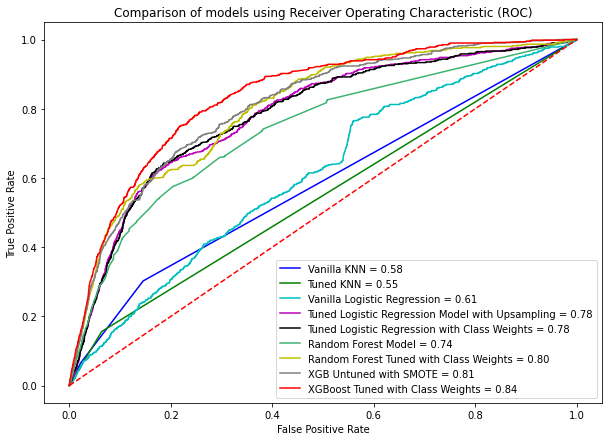

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Comparison of models using Receiver Operating Characteristic (ROC)')
plt.plot(fpr_knn, tpr_knn, label = 'Vanilla KNN = %0.2f' % auc_score_knn, color='b')
plt.plot(fpr_knn_tuned, tpr_knn_tuned, label = 'Tuned KNN = %0.2f' % auc_score_knn_tuned, color='g')
plt.plot(fpr_logreg_van, tpr_logreg_van, label = 'Vanilla Logistic Regression = %0.2f' % auc_score_logreg_van, color='c')
plt.plot(fpr_log_tuned_upsampled, tpr_log_tuned_upsampled, label = 'Tuned Logistic Regression Model with Upsampling = %0.2f' % auc_score_log_tuned_upsampled, color='m')
plt.plot(fpr_log_tuned_class_weight, tpr_log_tuned_class_weight, label = 'Tuned Logistic Regression with Class Weights = %0.2f' % auc_score_log_tuned_class_weight, color='k')
plt.plot(fpr_rf_vanilla, tpr_rf_vanilla, label = 'Random Forest Model = %0.2f' % auc_score_rf_vanilla, color='mediumseagreen')
plt.plot(fpr_rfc_tuned, tpr_rfc_tuned, label = 'Random Forest Tuned with Class Weights = %0.2f' % auc_score_rfc_tuned, color='y')
plt.plot(fpr_xgb_untuned_smote, tpr_xgb_untuned_smote, label = 'XGB Untuned with SMOTE = %0.2f' % auc_score_xgb_untuned_smote, color='0.5')
plt.plot(fpr_xgb_tuned, tpr_xgb_tuned, label = 'XGBoost Tuned with Class Weights = %0.2f' % auc_score_xgb_tuned, color='r')

plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

# Final Ensemble Model

Here, the thought is to select different Models with different strengths and combine them to achieve better results.

For example, a few models have a very good Recall on Minority while others have a very good Precision and Recall on Majority model. Then there are a few models with a good balance between the Recall of both the classes. 

We'll combine such models to achieve a general model with a better balance between the Recall and Precision of both classes.

Models to choose - 

1. KNN with k=5
2. XGBoost Tuned with Class Weights
3. XGB untuned with SMOTE
4. Tuned Logistic Regression with Up-Sampling
5. Tuned Logistic Regression with Up-Sampling using a threshold value of 0.23 (But this is Similar to XGB with SMOTE)
6. Random Forest Tuned with class weights and thresh = 0.60
7. Random Forest Untuned Without Sampling with t=.10

Let's prepare the train and test data first

In [ ]:
# We'll create a new Dataframe with columns as prediction values from different models

In [ ]:
# KNN with k=5
pred_dataframe=pd.DataFrame(pred_knn_tuned, columns=['KNN'])

In [ ]:
# XGBoost Tuned with Class Weights

pred_dataframe['XGB_Tuned_with_Class_weights'] = preds_xgb_tuned

In [ ]:
# XGB untuned with SMOTE

pred_dataframe['XGB_ununed_with_Smote'] = pred_xgb_untuned_smote

In [ ]:
# Tuned Logistic Regression with class weights

pred_dataframe['Log_Reg_Tuned_with_class_weights'] = pred_log_tuned_class_weight

In [ ]:
# Tuned Logistic Regression with Up-Sampling using a threshold value of 0.23

pred_dataframe['Log_Reg_with_threshold'] = labels_log_tuned_upsampled

In [ ]:
# Random Forest Tuned with class weights and thresh = 0.60

pred_dataframe['Random_Forest_tuned_with_threshold'] = labels_rfc_tuned

In [ ]:
# Random Forest Untuned Without Sampling with t=.10

pred_dataframe['Random_Forest_untuned_with_threshold'] = labels_rf_vanilla

In [ ]:
pred_dataframe.head()

,KNN,XGB_Tuned_with_Class_weights,XGB_ununed_with_Smote,Log_Reg_Tuned_with_class_weights,Log_Reg_with_threshold,Random_Forest_tuned_with_threshold,Random_Forest_untuned_with_threshold
0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [ ]:
pred_dataframe.shape

(15204, 7)

# Ensemble of Models

Let's first check if there are any two models (features in pred_dataframe) with same set of predictions

In [ ]:
duplicates = DropDuplicateFeatures()

# find duplicated features in the data set
duplicates.fit(pred_dataframe)
print(len(duplicates.features_to_drop_))
duplicates.duplicated_feature_sets_

0


[]

In [ ]:
# As we can see, all the models give a unique set of predictions

### Strategy 1

Here, we'll simply predict the mode of all the model predictions

In [ ]:
# Let's create a new column labels_mode
pred_dataframe['labels_mode']=pred_dataframe.mode(axis=1)
print('The classification Report is as follows:')
print(classification_report(y_val,pred_dataframe['labels_mode']))

The classification Report is as follows:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     14602
           1       0.13      0.70      0.22       602

    accuracy                           0.81     15204
   macro avg       0.56      0.76      0.56     15204
weighted avg       0.95      0.81      0.86     15204



In [ ]:
# As we can see, there is not much improvement as we expected
# The Results are comparable with XGB alone

### Strategy 2

Here, we'll take an average of all the predictions and decide a threshold to classify the average value as positive or Negative.

We'll try a range of values of thresholds.

In [ ]:
# Creating a new column for average without including label_mode
pred_dataframe['labels_avg']=pred_dataframe.drop(['labels_mode'],axis=1).sum(axis=1)/7

In [ ]:
thresh_avg=0.30
label_threshold = (pred_dataframe['labels_avg'].values > thresh_avg)*1
print('The classification Report is as follows:')
print(classification_report(y_val,label_threshold))

The classification Report is as follows:
              precision    recall  f1-score   support

           0       0.99      0.65      0.78     14602
           1       0.09      0.83      0.16       602

    accuracy                           0.66     15204
   macro avg       0.54      0.74      0.47     15204
weighted avg       0.95      0.66      0.76     15204



In [ ]:
# The Model is still not performing well on positive class in terms of Precision 

### Strategy 3

We'll train a logistic regression model on the new features we created out of predictions of various values.

By doing so, we'll give different weightage to different models, which might work better.

We already have the validation data, but in order to train a Log Reg model, we'll have to create train data (using training predictions as features) in similar fashion.

In [ ]:
# Lets create the train data first
# For KNN
pred_dataframe_train = pd.DataFrame(knn_tuned.predict(x_train), columns=['KNN'])

In [ ]:
# XGBoost Tuned with Class Weights

pred_dataframe_train['XGB_Tuned_with_Class_weights'] = xgb_tuned.predict(x_train)

In [ ]:
# XGB untuned with SMOTE

pred_dataframe_train['XGB_ununed_with_Smote'] = xgb_untuned_smote.predict(x_train)

In [ ]:
# Tuned Logistic Regression with class weights

pred_dataframe_train['Log_Reg_Tuned_with_class_weights'] = log_tuned_class_weight.predict(x_train)

In [ ]:
# Tuned Logistic Regression with Up-Sampling using a threshold value of 0.23

prob_log_tuned_upsampled_train = log_tuned_upsampled.predict_proba(x_train)[:,1]
thresh_train_log_tuned = 0.23
labels_log_tuned_upsampled_train=(prob_log_tuned_upsampled_train>thresh_train_log_tuned)*1
pred_dataframe_train['Log_Reg_with_threshold'] = labels_log_tuned_upsampled_train

In [ ]:
# Random Forest Tuned with class weights and thresh = 0.60

prob_rfc_tuned_train = rfc_tuned.predict_proba(x_train)[:,1]
thresh_train_rfc_tuned = 0.60
labels_rfc_tuned_train=(prob_rfc_tuned_train>thresh_train_rfc_tuned)*1
pred_dataframe_train['Random_Forest_tuned_with_threshold'] = labels_rfc_tuned_train

In [ ]:
# Random Forest Untuned Without Sampling with t=.10

prob_rf_vanilla_train = rf_vanilla.predict_proba(x_train)[:,1]
thresh_train_rf_vanilla = 0.60
labels_rf_vanilla_train=(prob_rf_vanilla_train>thresh_train_rf_vanilla)*1
pred_dataframe_train['Random_Forest_untuned_with_threshold'] = labels_rf_vanilla_train

In [ ]:
pred_dataframe_train.head()

,KNN,XGB_Tuned_with_Class_weights,XGB_ununed_with_Smote,Log_Reg_Tuned_with_class_weights,Log_Reg_with_threshold,Random_Forest_tuned_with_threshold,Random_Forest_untuned_with_threshold
0,0,1,1,1,1,1,0
1,0,0,1,1,1,0,0
2,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0
4,0,1,1,1,1,0,0


In [ ]:
pred_dataframe_train.shape

(60816, 7)

In [ ]:
# We'll have to check for Duplicate columns here also

duplicates_train = DropDuplicateFeatures()

# find duplicated features in the data set
duplicates_train.fit(pred_dataframe_train)
print(len(duplicates_train.features_to_drop_))
duplicates_train.duplicated_feature_sets_

0


[]

In [ ]:
# As expected, there are no Duplicates

In [ ]:
# Now, we'll prepare our train and test data

# our x_train is pred_dataframe_train and y_train is y_train

pred_dataframe_test = pred_dataframe.drop(['labels_mode', 'labels_avg'], axis=1)
# our x_val is pred_dataframe_test and y_val is y_val

In [ ]:
pred_dataframe_test.shape, pred_dataframe_train.shape

((15204, 7), (60816, 7))

In [ ]:
# Now, we'll fit a model
log_en = LogisticRegression()
log_en.fit(pred_dataframe_train,y_train)

pred_en = log_en.predict(pred_dataframe_test)

print(classification_report(y_val,pred_en))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94     14602
           1       0.14      0.39      0.21       602

    accuracy                           0.88     15204
   macro avg       0.56      0.65      0.57     15204
weighted avg       0.94      0.88      0.91     15204



In [ ]:
# The logistic regression does not improve the model

In [ ]:
# Let's train an XGB on the features created

xgb_en = XGBClassifier(scale_pos_weight = 25, eval_metric = 'logloss', seed =0, eta=0.01,
              n_estimators = 200, objective='binary:logistic', 
              nthreads=-1, early_stopping_rounds=10)

xgb_en.fit(pred_dataframe_train,y_train)

pred_en = xgb_en.predict(pred_dataframe_test)

print(classification_report(y_val,pred_en))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94     14602
           1       0.14      0.39      0.21       602

    accuracy                           0.88     15204
   macro avg       0.56      0.65      0.57     15204
weighted avg       0.94      0.88      0.91     15204



In [ ]:
# The performance is similar

# Somehow, the ensemble approach did not work for us

# The best Model we have is XGB Tuned with Class weights

In [ ]:
# Lets save pred_dataframe_train and pred_dataframe into csv formats

pred_dataframe_train.to_csv('drive/MyDrive/Univ.AI/Project_AI_1/pred_dataframe_train.csv', index=False)
pred_dataframe.to_csv('drive/MyDrive/Univ.AI/Project_AI_1/pred_dataframe.csv', index=False)

# Saving the Model

In [ ]:
# Saving the Model to pickle
path= 'drive/MyDrive/Univ.AI/Project_AI_1/final_xgb_tuned.pkl'
joblib.dump(xgb_tuned, path)

['drive/MyDrive/Univ.AI/Project_AI_1/final_xgb_tuned.pkl']

# Making the Predictions

In [ ]:
df_test = pd.read_csv(path_to_test)

In [ ]:
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [ ]:
df_test.shape

(75818, 370)

In [ ]:
# We need to remove all the features we have in the features_to_drop list

test_processed = df_test.drop(features_to_drop, axis=1)

In [ ]:
test_processed.shape

(75818, 184)

In [ ]:
# Let's load the saved model and make the predictions - 

saved_model = joblib.load('drive/MyDrive/Univ.AI/Project_AI_1/final_xgb_tuned.pkl')

In [ ]:
preds_test = saved_model.predict(test_processed)

In [ ]:
count_positive = (preds_test == 1).sum()
count_negative = (preds_test == 0).sum()

print("Total positives predicted by the Model ", count_positive)
print("Total Negatives predicted by the Model ", count_negative)

Total positives predicted by the Model  19382
Total Negatives predicted by the Model  56436


In [ ]:
# Predicting the Probabilities

preds_test_prob = saved_model.predict_proba(test_processed)[:,1]
print(preds_test_prob[:10])

[0.59658206 0.60710794 0.07784732 0.25457814 0.06653079 0.88752013
 0.40541402 0.81366533 0.49165952 0.39774317]


### Permutation Feature Importance on Selected Model

In [ ]:
r = permutation_importance(saved_model, x_val, y_val,n_repeats=30,random_state=0,scoring='f1_macro')

In [ ]:
# Creating a new score for importance as we want high mean and low std
importances=r.importances_mean-2*r.importances_std
importances_dataframe = pd.DataFrame(importances, index=x_val.columns, columns=['Importance_Score'])
# Sorting the values
importances_dataframe.sort_values(by='Importance_Score', ascending=False, inplace=True)
# Selecting the top 10 features
importances_dataframe=importances_dataframe[importances_dataframe['Importance_Score']>0]
importances_dataframe

,Importance_Score
var15,0.074560
saldo_var30,0.042558
num_var42_0,0.000645
num_meses_var5_ult3,0.000608


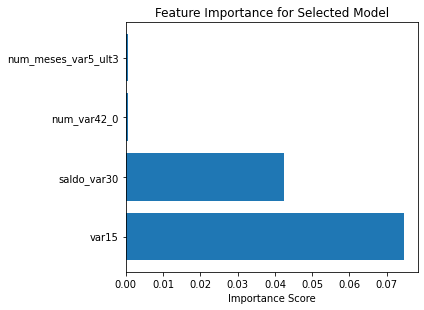

In [ ]:
plt.barh(y=importances_dataframe.index, width=importances_dataframe['Importance_Score'])
plt.tight_layout()
plt.xlabel('Importance Score')
plt.title('Feature Importance for Selected Model')
plt.show()

# Conclusion

Note that our model classifies around 19000 customers as Un-satisfied. This is because we have a lot of False Positives for our chosen model.

From the trade-off between False Negatives and False positives, we chose to have low False Negatives at the cost of False Positives because we'll lose a customer altogether if we have high False Negative. We should keep in mind that the customer acquisition cost is high, not to mention the damage to goodwill it causes when an unsatisfied customer leaves due to negligence of the business.

On the other hand, it'll not hurt much to waste a little budget in order to talk to customers who were misclassified as Unsatisfied. 

This will only result in an increased loyalty towards the business.

# Scope for Future Work

We were not able to achieve a good Precision and Recall at the same time. This was because of the heavy imbalance in the data.

We might want to re-design the way we collect the data as we strongly believe that a lot of un-satisfied customers are going un-noticed. If we can reduce this imbalance in data to a certain extent, predicting power may increase.

Secondly, we may try using Neural Networks in future to check if we are able to better detect the Minority class.